In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\jiaha\Downloads\starcraft_player_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

First things first, we want to make sure we have a good idea what the data shows overall and what might not be acurate data points. My first thought is to look at the 3 columns here that have object type rather than a numerical one especially since these columns are typically in numerical terms.

In [3]:
df.columns[df.isin(["?"]).any()]

Index(['Age', 'HoursPerWeek', 'TotalHours'], dtype='object')

In [4]:
df[df.isin(["?"]).any(axis = 1)]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


We see that the entirety of the pros have no data on age, game per week, and total hours. We also have a few with ? values for hours per week and total hours. For now we will leave them as such and replace all with NaN's and transform back to numerical values.

In [5]:
df[['Age', 'HoursPerWeek', 'TotalHours']] = df[['Age', 'HoursPerWeek', 'TotalHours']].replace("?", np.nan).fillna(-1).astype(int).replace(-1, np.nan)

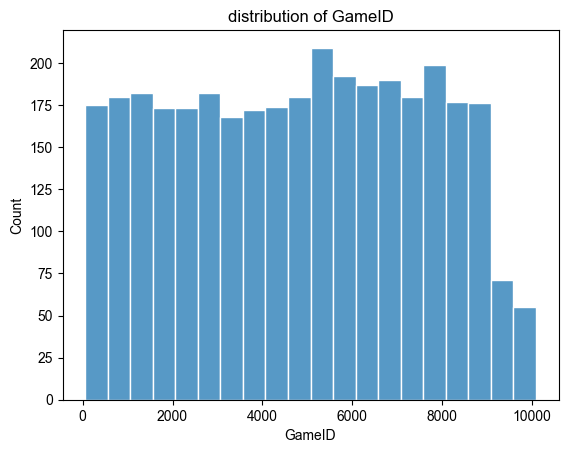

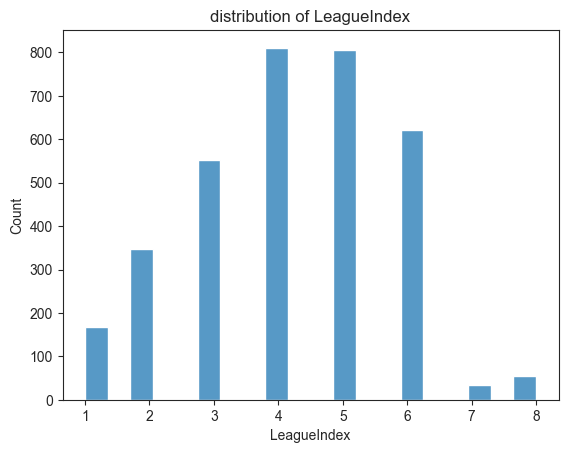

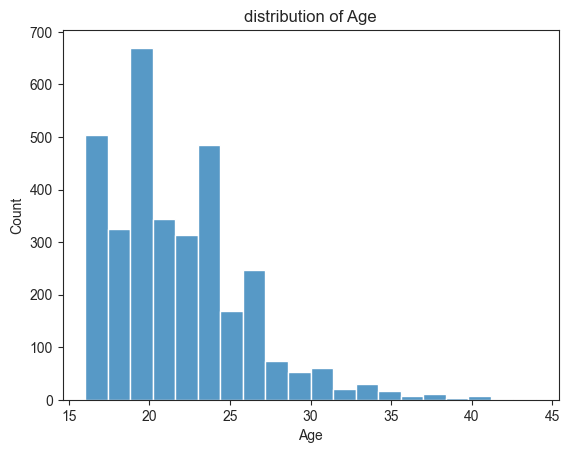

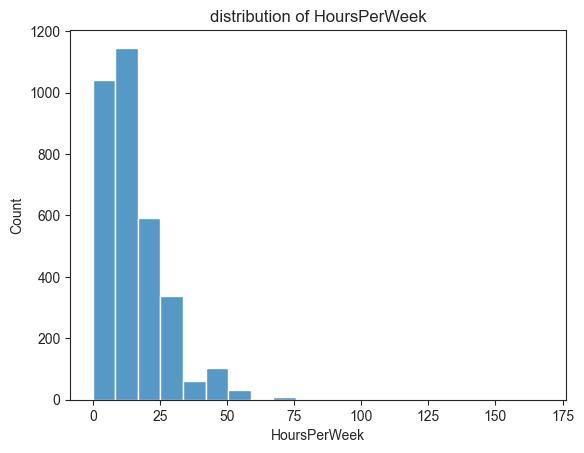

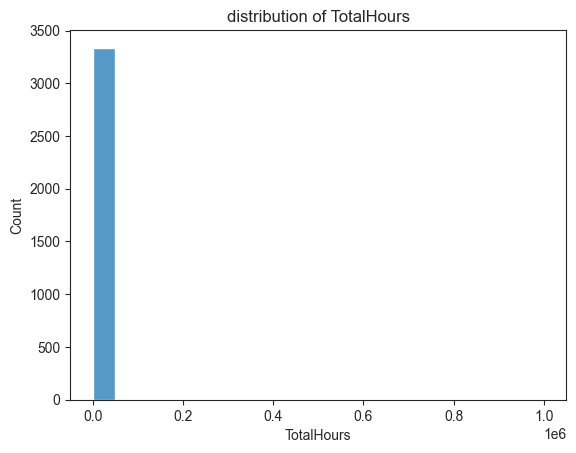

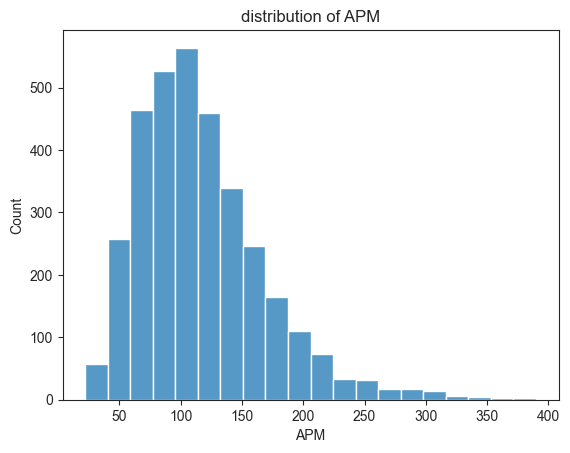

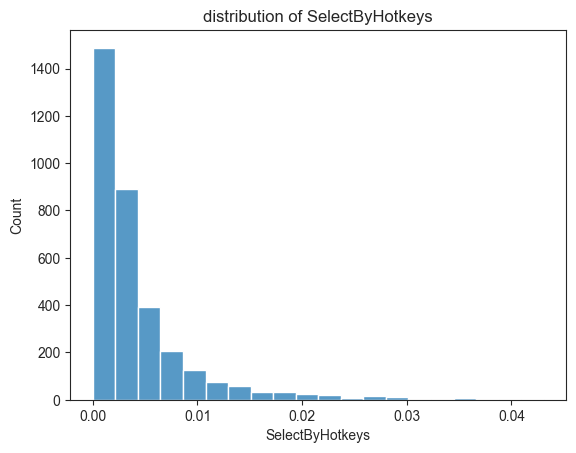

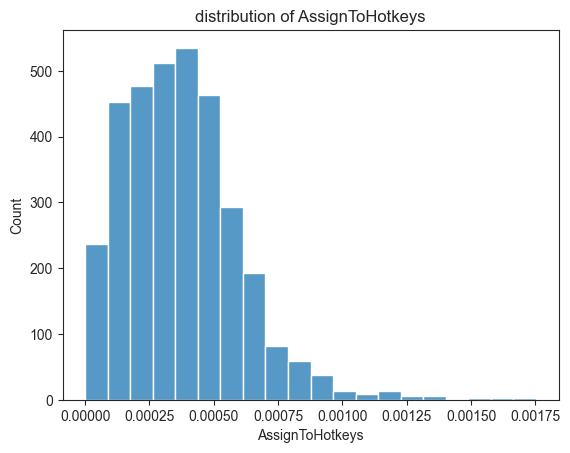

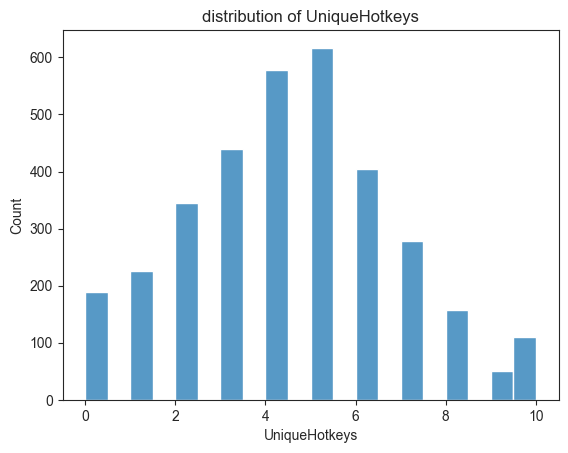

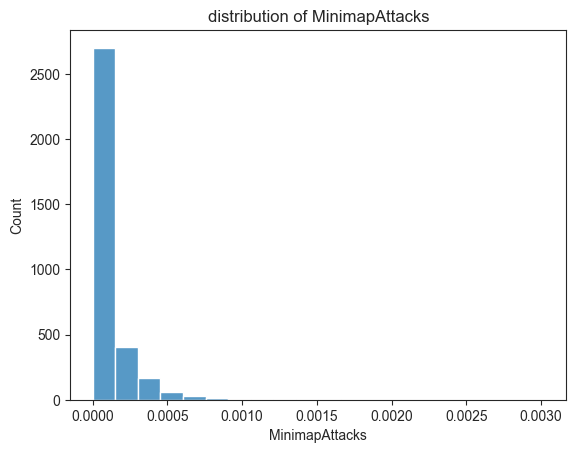

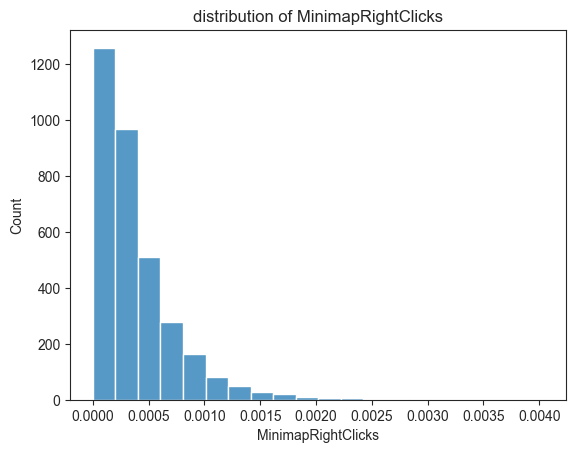

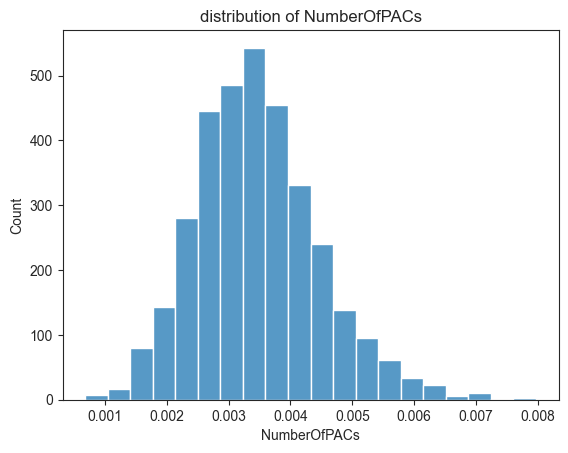

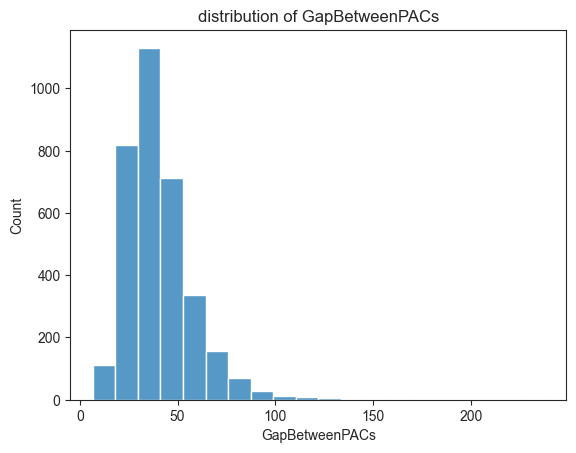

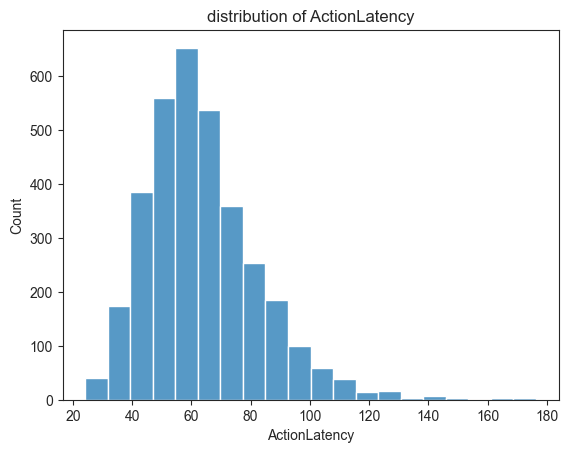

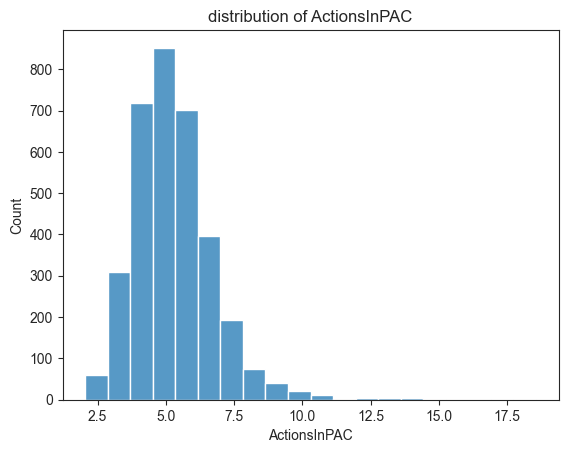

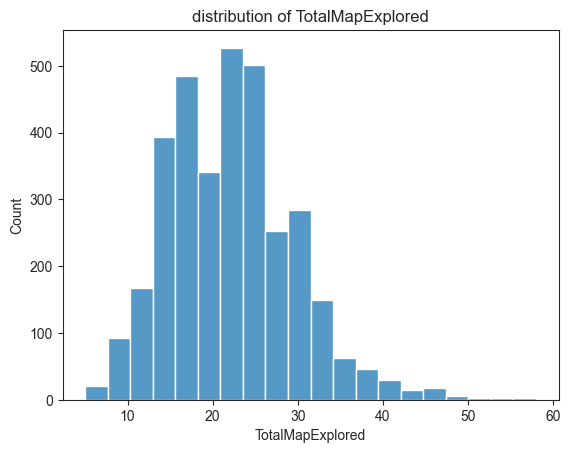

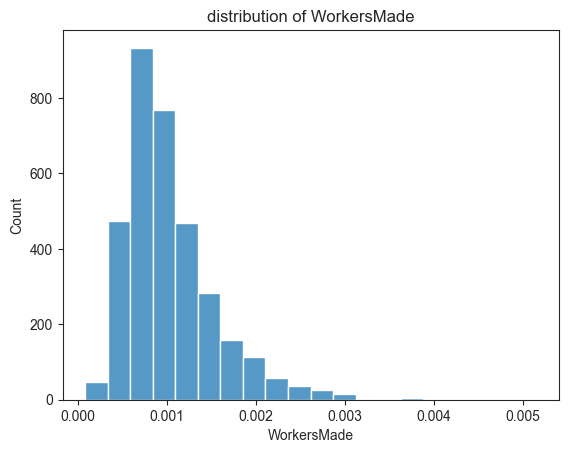

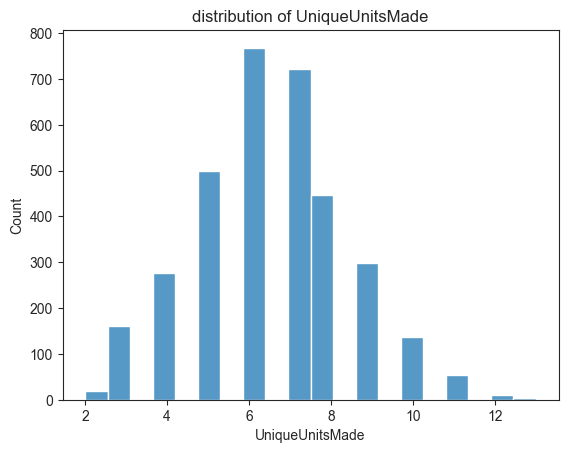

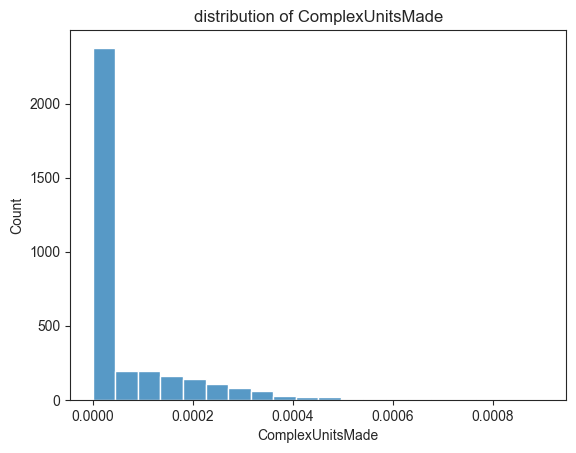

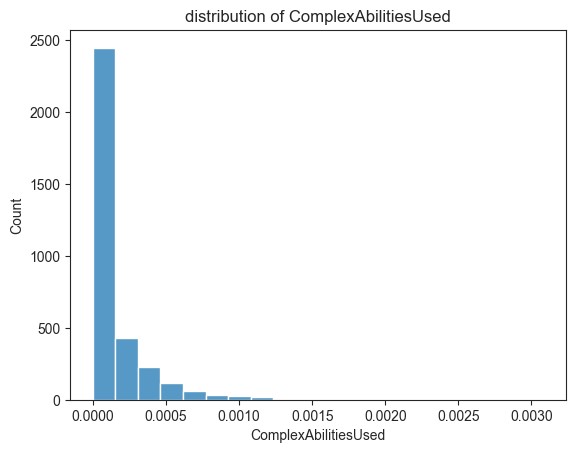

In [6]:
for i in list(df.columns):
    curr = df[i].dtype
    if curr != object:
        plt.title('distribution of ' + i)
        sns.set_style("ticks")
        if curr == int:
            sns.barplot(data = df, x = i)
        else:
            sns.histplot(data = df, x = i, bins=20)
        plt.show()

It seems that most the variables are accurately described (the ingame data). And just hypothetically thinking it through, it would be hard to classify outliers as erroneous when they could very well be what you look for in the next big star. However, acceptance of the data does not extend to other data values (Age, HoursPerWeek, TotalHours). The hisograms seem to indicate some really large values in time spent on the game. 

In [7]:
pd.set_option('display.max_rows', None)
df[df.HoursPerWeek > 70] # 10 hours a day

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
237,711,5,17.0,96.0,900.0,145.8060,0.010374,0.000596,4,0.000000,0.000030,0.003965,43.2906,54.4060,4.3008,21,0.001014,8,0.000000,0.000104
690,2000,6,16.0,168.0,1260.0,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502
895,2606,6,22.0,84.0,800.0,250.2990,0.024904,0.001192,10,0.000222,0.000344,0.004445,28.0091,43.1273,5.1636,28,0.000849,7,0.000000,0.000717
1050,3027,2,16.0,72.0,144.0,74.5200,0.001473,0.000166,5,0.000000,0.000102,0.002574,56.4400,80.0995,4.9502,13,0.000628,6,0.000000,0.000038
1280,3733,6,24.0,112.0,1500.0,139.7598,0.005748,0.000368,4,0.000213,0.000155,0.005011,24.6822,41.8956,4.1489,28,0.000756,5,0.000000,0.000000
1299,3768,5,22.0,90.0,1000.0,89.6652,0.001847,0.000360,5,0.000172,0.000297,0.002551,37.2099,71.6074,5.8834,13,0.000986,5,0.000094,0.000031
1654,4754,7,18.0,98.0,700.0,236.0316,0.015664,0.001015,10,0.000366,0.001632,0.006487,18.7787,29.9871,4.3371,25,0.001507,8,0.000000,0.000000
1677,4817,6,21.0,140.0,1800.0,197.7774,0.006001,0.000383,4,0.000308,0.001307,0.004445,29.9962,42.8764,7.0019,32,0.001365,11,0.000058,0.000350
1796,5147,4,22.0,84.0,640.0,149.6574,0.003935,0.000521,3,0.000000,0.000046,0.004074,29.0142,46.9886,5.9886,27,0.001377,6,0.000243,0.001007
2159,6074,3,18.0,80.0,200.0,146.5200,0.006215,0.000393,4,0.000049,0.000147,0.002899,35.4872,64.8136,7.3983,11,0.000442,3,0.000000,0.000000


We see that majority of them are under 100 hours per week. The 168 hours seems nearly impossible as 24*7 = 168 meaning this person played for every hour nonstop.

In [8]:
df[df.TotalHours > 3000]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
7,72,7,17.0,42.0,10000.0,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
10,83,3,16.0,16.0,6000.0,153.8010,0.001677,0.000319,4,0.000000,0.000822,0.003772,23.4107,48.0711,7.0044,24,0.001593,7,0.000000,0.000017
14,100,5,16.0,30.0,5000.0,160.4754,0.004254,0.000432,2,0.000775,0.000406,0.004571,36.2897,46.8889,5.4361,28,0.001981,7,0.000000,0.000000
289,837,4,19.0,28.0,4000.0,194.1858,0.011964,0.000503,4,0.000246,0.000328,0.004952,39.8389,41.0591,4.6454,22,0.000925,6,0.000351,0.000140
338,1009,5,20.0,40.0,5000.0,84.7086,0.001113,0.000083,2,0.000241,0.000399,0.003124,48.5120,62.6064,4.5585,25,0.001255,7,0.000042,0.000299
770,2246,5,22.0,16.0,20000.0,248.0490,0.023703,0.000391,7,0.000000,0.000205,0.004651,37.8795,45.3760,4.7560,21,0.001526,6,0.000000,0.000000
862,2509,6,23.0,8.0,4000.0,142.7916,0.004051,0.000548,3,0.000445,0.000377,0.004591,23.2822,45.4627,5.0616,23,0.000685,7,0.000000,0.000334
1352,3884,6,21.0,20.0,5000.0,141.6486,0.005895,0.000660,3,0.000000,0.000330,0.004224,21.6465,50.4786,4.9244,22,0.000617,7,0.000000,0.000223
1793,5140,5,18.0,24.0,1000000.0,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.000000,0.000000


Some of these are definitely not possible primarily the 1000000 hours. If we change the variables to see how many weeks/years players play maybe we get more info?

In [9]:
df['weeks'] = df['TotalHours'] / df['HoursPerWeek'] 
df['years'] = df['weeks'] / 52 

In [10]:
time_data = df[['Age', 'HoursPerWeek', 'TotalHours', 'weeks', 'years']]
time_data.head()

,Age,HoursPerWeek,TotalHours,weeks,years
0,27.0,10.0,3000.0,300.0,5.769231
1,23.0,10.0,5000.0,500.0,9.615385
2,30.0,10.0,200.0,20.0,0.384615
3,19.0,20.0,400.0,20.0,0.384615
4,32.0,10.0,500.0,50.0,0.961538


In [11]:
def get_sorted_on_condition(df, condition, value, greater = False, asc = False):
    if greater:
        return df[df[condition] > value].sort_values(by = condition, ascending = asc)
    else:
        return df[df[condition] < value].sort_values(by = condition, ascending = asc)

In [12]:
get_sorted_on_condition(time_data, 'years', 5, greater = True, asc = False)

,Age,HoursPerWeek,TotalHours,weeks,years
1037,16.0,0.0,365.0,inf,inf
1793,18.0,24.0,1000000.0,4.166667e+04,801.282051
2324,20.0,8.0,25000.0,3.125000e+03,60.096154
1978,22.0,10.0,18000.0,1.800000e+03,34.615385
770,22.0,16.0,20000.0,1.250000e+03,24.038462
2140,22.0,10.0,9000.0,9.000000e+02,17.307692
2251,16.0,2.0,1260.0,6.300000e+02,12.115385
2216,24.0,20.0,10260.0,5.130000e+02,9.865385
1356,19.0,2.0,1000.0,5.000000e+02,9.615385
862,23.0,8.0,4000.0,5.000000e+02,9.615385


In [13]:
time_data['diff_years'] = time_data['Age'] - time_data['years']
get_sorted_on_condition(time_data, 'diff_years', 10, greater = False, asc = False)

C:\Users\jiaha\AppData\Local\Temp\ipykernel_24732\1180417835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['diff_years'] = time_data['Age'] - time_data['years']


,Age,HoursPerWeek,TotalHours,weeks,years,diff_years
1356,19.0,2.0,1000.0,5.000000e+02,9.615385,9.384615
2440,19.0,4.0,2000.0,5.000000e+02,9.615385,9.384615
10,16.0,16.0,6000.0,3.750000e+02,7.211538,8.788462
2140,22.0,10.0,9000.0,9.000000e+02,17.307692,4.692308
2251,16.0,2.0,1260.0,6.300000e+02,12.115385,3.884615
770,22.0,16.0,20000.0,1.250000e+03,24.038462,-2.038462
1978,22.0,10.0,18000.0,1.800000e+03,34.615385,-12.615385
2324,20.0,8.0,25000.0,3.125000e+03,60.096154,-40.096154
1793,18.0,24.0,1000000.0,4.166667e+04,801.282051,-783.282051
1037,16.0,0.0,365.0,inf,inf,-inf


This overall is quite interesting. We find certain value combinations are just not possible. I personally think it's hard for young kids under 8 to really actually play starcraft and consider these values as wrong as well.

In [14]:
df['diff_years'] = df['Age'] - df['years']
df[(df.TotalHours < df.HoursPerWeek)]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,weeks,years,diff_years
184,584,2,24.0,12.0,10.0,44.5248,0.001870,0.000152,0,0.000051,0.000126,0.002047,66.3500,97.9259,3.3580,11,0.000606,3,0.0,0.000000,0.833333,0.016026,23.983974
976,2829,3,16.0,28.0,3.0,69.5748,0.001016,0.000371,3,0.000000,0.000239,0.003623,57.3775,69.4389,3.3234,18,0.000550,7,0.0,0.000490,0.107143,0.002060,15.997940
1244,3610,3,18.0,42.0,30.0,95.6886,0.003646,0.000540,10,0.000000,0.000304,0.001620,33.1064,110.3333,8.0833,7,0.000776,4,0.0,0.000000,0.714286,0.013736,17.986264
1865,5326,1,20.0,20.0,16.0,73.2594,0.000954,0.000136,5,0.000000,0.000099,0.003866,52.8103,69.4359,3.2981,21,0.000694,6,0.0,0.000000,0.800000,0.015385,19.984615
2458,6888,1,16.0,56.0,50.0,49.4184,0.001511,0.000143,2,0.000000,0.000306,0.001306,71.1111,104.6875,6.2500,12,0.000653,6,0.0,0.000000,0.892857,0.017170,15.982830
2799,7801,2,19.0,20.0,12.0,57.1536,0.001584,0.000332,5,0.000011,0.000266,0.003190,61.4216,81.3611,3.0174,17,0.000864,7,0.0,0.000055,0.600000,0.011538,18.988462
2946,8176,1,17.0,28.0,20.0,91.2876,0.003119,0.000543,7,0.000000,0.000081,0.002878,22.0000,59.4126,4.9371,14,0.000906,6,0.0,0.000081,0.714286,0.013736,16.986264


It is also hard to imagine having played more hours per week than hours total. However if we assume that the values of these players are such that they play less than 1 week and so the data is extrapolating on what would happen if they played at the same rate it can be possible. (For example, if person 1244 plays 6 hrs a day for 5 days, total hours per week would be 6 hrs a day for 7 days or 42 hours as we see here).

With limited time, I will choose to do the analysis without these bad data points (maybe perhaps see what to do with them afterwards?).

In [15]:
usable_data = df[(df.HoursPerWeek < 168) & (df.diff_years > 8) | (df.LeagueIndex == 8)]

Now we should open up our analysis including the other variables.

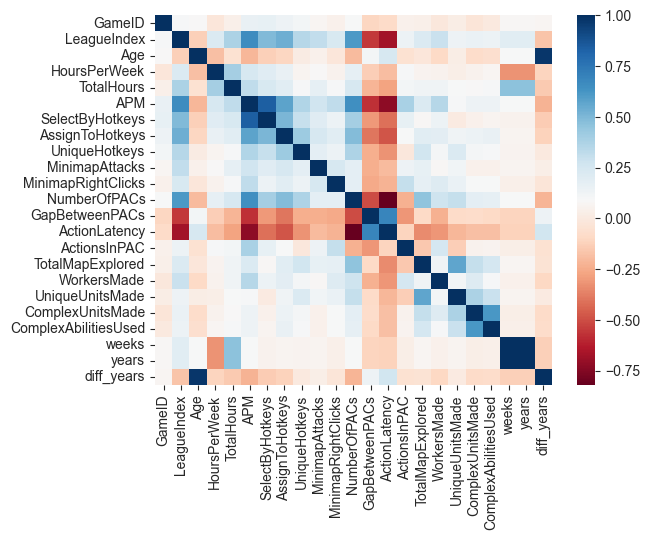

In [16]:
sns.heatmap(usable_data.corr(), annot=False, cmap='RdBu')
plt.show()

There seems to be some clustering here, lets use correlation clustering and see what variables seem to group with each other.

<Axes: >

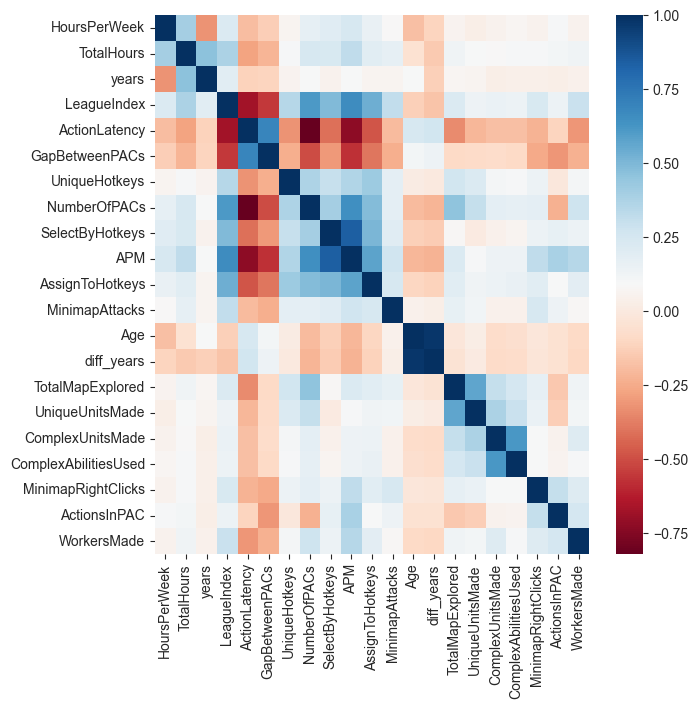

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
m = usable_data.drop(columns=['GameID', 'weeks'])
corr = m.corr()
plt.figure(figsize=(7,7))
dissimilarity = 1 - abs(corr)
Z = linkage(squareform(dissimilarity), 'complete')
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(m.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(m[i])
    else:
        df_to_append = pd.DataFrame(m[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

correlations = clustered.corr()
sns.heatmap(correlations, cmap='RdBu')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [63.75, 63.75, 102.5, 102.5],
  [45.0, 45.0, 83.125, 83.125],
  [35.0, 35.0, 64.0625, 64.0625],
  [12.5, 12.5, 49.53125, 49.53125],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [160.0, 160.0, 192.5, 192.5],
  [130.0, 130.0, 176.25, 176.25],
  [31.015625, 31.015625, 153.125, 153.125]],
 'dcoord': [[0.0, 0.5355602876578001, 0.5355602876578001, 0.0],
  [0.0, 0.6836501842178364, 0.6836501842178364, 0.5355602876578001],
  [0.0, 0.17989971958265505, 0.17989971958265505, 0.0],
  [0.0, 0.3876375082782634, 0.3876375082782634, 0.17989971958265505],
  [0.0, 0.493946525147959, 0.493946525147959, 0.3876375082782634],
  [0.0, 0.16060411665715368

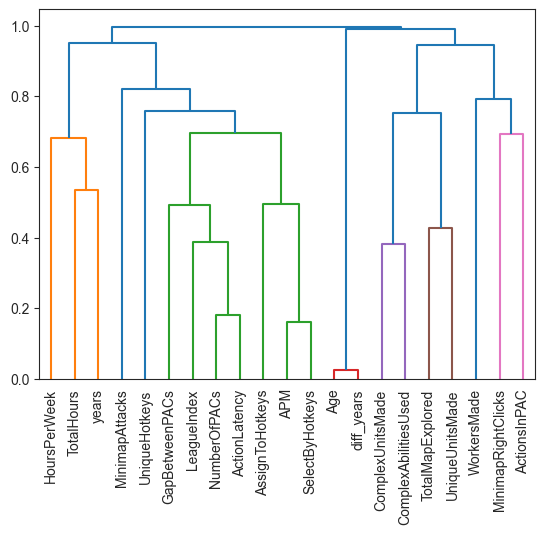

In [18]:
dendrogram(Z, labels=m.columns, orientation='top', leaf_rotation=90)

From both of these, we can group the values into effectively two parts, the left side generally moves in a single direction as you increase rankwhile the  right side increases until it stops or goes backwards for the pro league.

In [19]:
usable_data.drop(columns=['GameID']).groupby('LeagueIndex').mean()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,weeks,years,diff_years
LeagueIndex,,,,,,,,,,,,,,,,,,,,,
1,22.724551,13.125749,264.191617,59.539277,0.001081,0.000185,3.215569,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,18.730539,0.000626,5.826347,0.000015,0.000042,28.542685,0.548898,22.175653
2,22.155620,13.296830,331.409222,74.780917,0.001536,0.000222,3.351585,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,19.824207,0.000801,6.074928,0.000024,0.000076,32.499583,0.624992,21.530628
3,22.050633,13.949367,493.792043,89.971260,0.002188,0.000282,3.687161,0.000056,0.000332,0.002976,46.143882,73.697301,5.163282,20.506329,0.000919,6.368897,0.000045,0.000117,45.486412,0.874739,21.175894
4,21.981481,14.027160,566.509877,105.789894,0.003139,0.000340,3.975309,0.000075,0.000368,0.003310,41.027663,64.794768,5.237316,22.023457,0.001006,6.575309,0.000065,0.000138,53.381714,1.026571,20.954910
5,21.374532,16.177278,747.431960,131.277778,0.004935,0.000413,4.696629,0.000114,0.000427,0.003741,34.723394,56.117142,5.472571,23.058677,0.001168,6.701623,0.000076,0.000176,60.963360,1.172372,20.202160
6,20.701783,20.936791,949.619125,158.516850,0.007416,0.000512,5.518639,0.000156,0.000471,0.004232,30.213380,48.964222,5.473441,24.301459,0.001209,6.873582,0.000077,0.000182,58.806841,1.130901,19.570882
7,21.171429,31.714286,1581.028571,189.555686,0.009418,0.000723,6.771429,0.000340,0.000570,0.005111,22.978160,40.342903,5.226089,28.028571,0.001238,7.028571,0.000082,0.000267,62.504252,1.202005,19.969424
8,NaN,NaN,NaN,267.341236,0.020981,0.000937,7.345455,0.000376,0.000831,0.005237,18.969773,35.390153,5.676727,22.854545,0.001077,6.127273,0.000026,0.000135,NaN,NaN,NaN


When conditioning on league rank, similar information to the dendrogram comes out (could also probably be verified with kernel density graphs conditioning on rank). What is more interesting here is that the pro league has what seems to be more agressive games? Various units made variables, complex features used, map explored - things that increase with duration of the game/greeding for better things - don't happen as much and are punished in the pro leagues. Total amount of time spent on the game increases but age seems to hover around the same. It is dangerous however to fully assume extrapolating the data would be accurate as the values in pro leagues seem to kinda be out of sample?

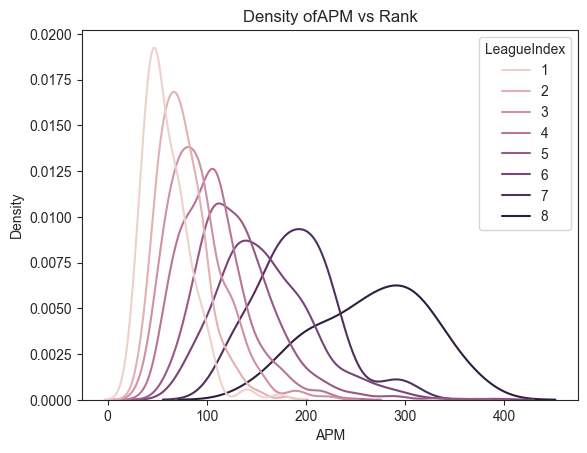

In [20]:
def kernel_plot(df, x):
    plt.title('Density of' + x + ' vs Rank')
    sns.kdeplot(data=df, x=x, hue = 'LeagueIndex', common_norm=False)
    plt.show()

kernel_plot(usable_data, 'APM') # for example

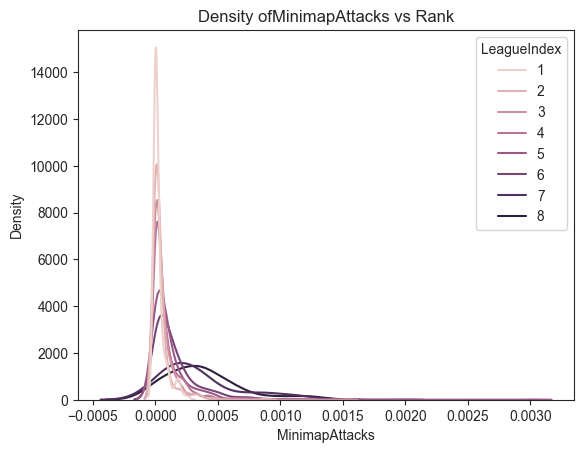

In [21]:
kernel_plot(usable_data, 'MinimapAttacks')

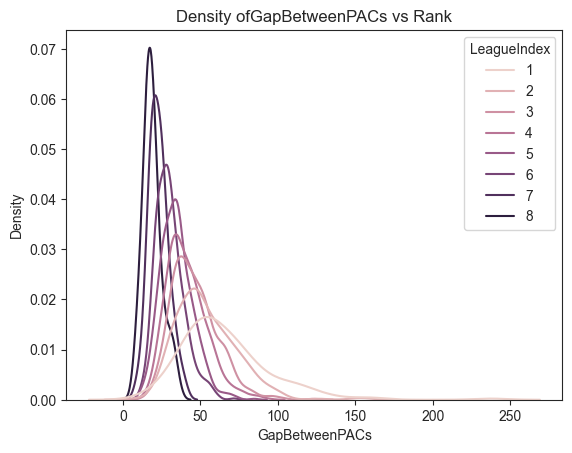

In [22]:
kernel_plot(usable_data, 'GapBetweenPACs')

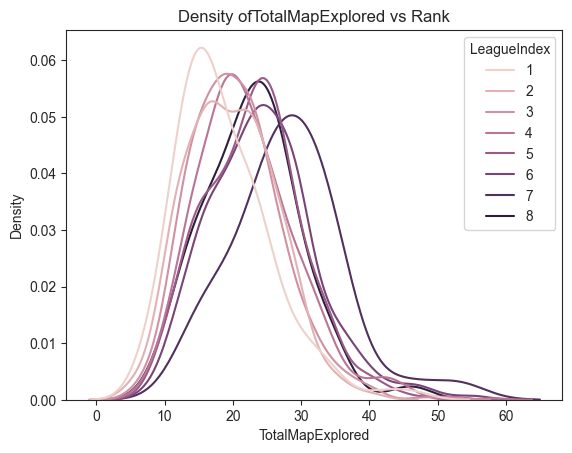

In [23]:
kernel_plot(usable_data, 'TotalMapExplored')

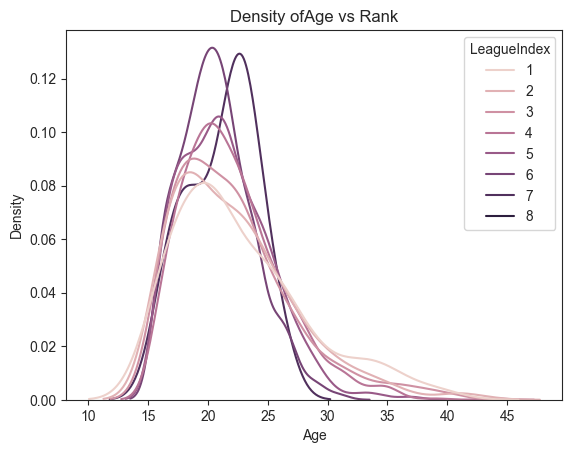

In [24]:
kernel_plot(usable_data, 'Age')

Age overall doesn't seem to impact results to much and enough at this moment to consider imputing for pro league the mean/median of grandmaster (being that this is the closest).

In [25]:
print(usable_data[usable_data.LeagueIndex == 7].Age.median())
usable_data['Age'] = usable_data['Age'].fillna(22)

22.0


C:\Users\jiaha\AppData\Local\Temp\ipykernel_24732\3627971321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_data['Age'] = usable_data['Age'].fillna(22)


In [26]:
def inter_league_bins(df, col, rank):
    vals = df[df.LeagueIndex == rank]
    vals[col + '_bins'] = pd.qcut(vals[col], q=4)
    return vals.groupby(col + '_bins').mean()

inter_league_bins(df, 'TotalHours', 7)

C:\Users\jiaha\AppData\Local\Temp\ipykernel_24732\1082789255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vals[col + '_bins'] = pd.qcut(vals[col], q=4)


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,weeks,years,diff_years
TotalHours_bins,,,,,,,,,,,,,,,,,,,,,,,
"(239.999, 715.0]",4994.222222,7.0,19.555556,29.777778,487.777778,173.433867,0.008343,0.000656,7.222222,0.000281,0.000562,0.004984,24.810578,42.392267,4.986300,24.444444,0.001246,6.666667,0.000051,0.000082,31.693122,0.609483,18.946072
"(715.0, 1250.0]",4807.500000,7.0,22.600000,18.800000,1008.000000,194.070180,0.009834,0.000739,6.500000,0.000472,0.000633,0.005089,20.722800,40.637260,5.254850,28.100000,0.001020,7.000000,0.000040,0.000108,68.656151,1.320311,21.279689
"(1250.0, 2000.0]",4461.375000,7.0,21.000000,36.250000,1620.750000,210.148575,0.011619,0.000833,6.125000,0.000196,0.000520,0.005052,20.552825,38.894125,5.588825,25.125000,0.001593,6.125000,0.000064,0.000109,68.871032,1.324443,19.675557
"(2000.0, 10000.0]",4402.250000,7.0,21.375000,45.500000,3487.500000,181.456725,0.007908,0.000670,7.250000,0.000387,0.000551,0.005342,26.161225,39.118200,5.097162,34.875000,0.001148,8.375000,0.000186,0.000832,83.110119,1.598272,19.776728


For imputing the time variables, I am considering using a regression based approach. Realising that most of these data is nearly mostly out of sample relative to the data given so far using a method that is robust to out of sample situation works best. 

<Axes: >

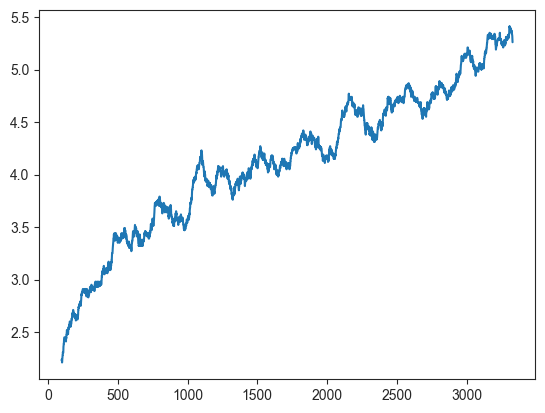

In [27]:
def plot_learning_curve(df, col):
    return df[(df.TotalHours < 10000)].sort_values(col)['LeagueIndex'].rolling(window=100).mean().reset_index(drop=True).plot() #remove the 1 big outlier that pushes the line too much
plot_learning_curve(usable_data, 'TotalHours')

<Axes: >

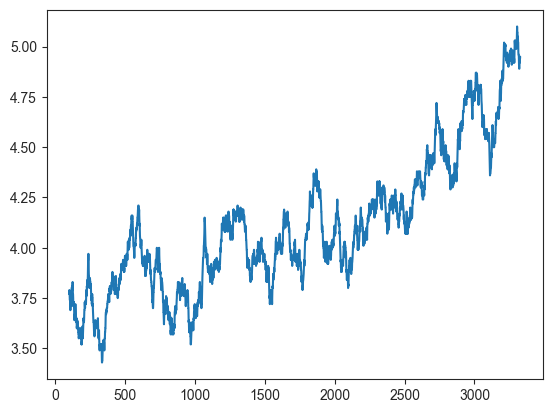

In [28]:
plot_learning_curve(usable_data, 'HoursPerWeek')

<Axes: >

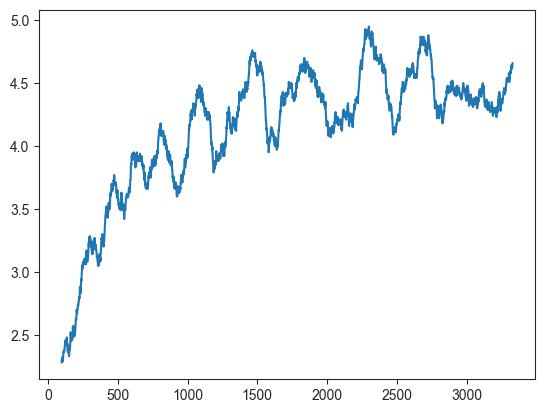

In [29]:
plot_learning_curve(usable_data, 'weeks')

The relationship between rank and time overall is less than linear (with power less than 1) while the one with time per week seems superlinear. We will best approximate with linear trends as mentioned before. But these graphs may be interesting to examine more for looking for talent. Those ahead of this curve may show more promise than those below.

In [30]:
from sklearn.linear_model import LinearRegression
impute = usable_data.drop(columns = ['GameID', 'weeks', 'years', 'diff_years'])
mia = impute.columns[impute.isnull().any()].tolist()
notmia = impute.columns.difference(mia).tolist()

copy = impute.copy()
copy = copy.dropna()

for column in mia:
    X_train = copy[notmia]
    y_train = copy[column]
    X_test = impute[impute[column].isnull()][notmia]
    model = LinearRegression()
    model.fit(X_train, y_train)
    impute.loc[impute[column].isnull(), column] = model.predict(X_test)

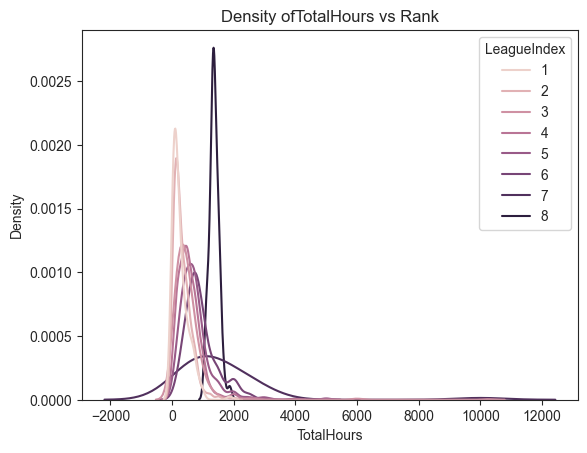

In [31]:
kernel_plot(impute, 'TotalHours')

Sadly, not the ideal results we would want. With more time to investigate other methods of imputation could lead to picking one that poduces a better distribution.

In order to create a predictive model based on the features so far, we should try and use a tree based method where correlation between terms won't be as much of an issue compared to regression based models. Another choice I will make is to use classification rather than regression since the responce variable is ordinal.

In [32]:
impute['week'] = impute['TotalHours'] / impute['HoursPerWeek']

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X = impute.drop(columns = ['LeagueIndex'])
y = impute['LeagueIndex']

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Create the Grid Search object with k-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=KFold(n_splits=5))

# Perform Grid Search
grid_search.fit(X, y)

# Access the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_model, best_params)


RandomForestClassifier(max_depth=10, min_samples_leaf=4) {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = rf.fit(X_train, y_train)
y_score = clf.predict(X_test)

In [35]:
from sklearn.metrics import roc_auc_score
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
         
        other_class = [x for x in unique_class if x != per_class]

        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_score)
roc_auc_dict

{1: 0.621875,
 2: 0.624395536609277,
 3: 0.5825685645284017,
 4: 0.6235700851864145,
 5: 0.6310182767624022,
 6: 0.7281219001432823,
 7: 0.5,
 8: 0.96775}

Overall it did decently without given the time for a full grid search of hyperparameters. The pros did very well but I believe this is due to my imputation and with this result redo without these variables. in the model.

In [36]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)
X = X.drop(columns=['Age', 'HoursPerWeek', 'TotalHours'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = rf.fit(X_train, y_train)
y_score = clf.predict(X_test)

roc_auc_dict = roc_auc_score_multiclass(y_test, y_score)
roc_auc_dict

{1: 0.6465773809523809,
 2: 0.6391449941068262,
 3: 0.5487808912561618,
 4: 0.6051222480362872,
 5: 0.5844073107049609,
 6: 0.725697123332966,
 7: 0.5,
 8: 0.874}

I stand corrected, perhaps the structure of pro games lends itself to be classified a bit easier even without the help of my imputations.

Overall, the model fit decently predicting the likelihoods of players being in certain ranks.  If I were able to be given more data, I would focus on the validity of some of the outside of the game values (Age, Hours, etc). Perhaps collecting data based on more categorical feelings or an easier way for players to know their actuate values of total time spent would have been better. My main focus now in model building would be on how to generate classifications based on the data to characterize play styles. I have tried some PCA - k means classification to little success within the time available to me.